In [112]:
import pandas as pd
url = 'https://www.pro-football-reference.com/years/2020/passing.htm'
df = pd.read_html(url)[0]
print(df)

    Rk              Player   Tm Age  Pos   G  GS   QBrec  Cmp  Att  ...  \
0    1      Justin Herbert  LAC  22   QB  13  13   4-9-0  353  531  ...   
1    2  Ben Roethlisberger  PIT  38   QB  13  13  11-2-0  345  521  ...   
2    3           Matt Ryan  ATL  35   QB  13  13   4-9-0  317  498  ...   
3    4           Tom Brady  TAM  43   QB  13  13   8-5-0  322  497  ...   
4    5     Patrick Mahomes  KAN  25   QB  13  13  12-1-0  340  497  ...   
..  ..                 ...  ...  ..  ...  ..  ..     ...  ...  ...  ...   
95  93        Logan Thomas  WAS  29   TE  13  12     NaN    1    1  ...   
96  94      Tommy Townsend  KAN  24    p  13   0     NaN    1    1  ...   
97  95  Cedrick Wilson Jr.  DAL  25  NaN  13   0     NaN    1    1  ...   
98  96      Logan Woodside  TEN  25  NaN   4   0     NaN    1    1  ...   
99  97       Isaiah Wright  WAS  23   wr  11   6     NaN    0    1  ...   

      Y/G   Rate    QBR  Sk Yds.1   NY/A  ANY/A  Sk%  4QC  GWD  
0   290.8   96.3   68.3  27   171 

In [130]:
from bs4 import BeautifulSoup
import requests

source = requests.get('https://www.pro-football-reference.com/years/2020/passing.htm').text
soup = BeautifulSoup(source, 'lxml')
passing = soup.find('table')
body = passing.find('tbody')
# print(body.prettify())
# for teams in body.find_all("td", {"data-stat":"team"}):
#      team = teams.a.text
#      print(team)

allnames = []
for tr in body.find_all('tr'):
    try:
        name = tr.td.a.text
        allnames.append(name)
    except:
        None
print(allnames)


['Justin Herbert ', 'Ben Roethlisberger', 'Matt Ryan', 'Tom Brady ', 'Patrick Mahomes ', 'Jared Goff', 'Josh Allen ', 'Russell Wilson ', 'Matthew Stafford', 'Kyler Murray ', 'Philip Rivers', 'Aaron Rodgers ', 'Derek Carr', 'Carson Wentz ', 'Deshaun Watson ', 'Teddy Bridgewater', 'Joe Burrow ', 'Ryan Tannehill', 'Kirk Cousins ', 'Daniel Jones ', 'Baker Mayfield', 'Drew Lock', 'Nick Foles', 'Lamar Jackson', 'Cam Newton', 'Drew Brees', 'Gardner Minshew II', 'Nick Mullens ', 'Sam Darnold ', 'Ryan Fitzpatrick', 'Andy Dalton', 'Dak Prescott ', 'Alex Smith', 'Mitchell Trubisky ', 'Tua Tagovailoa ', 'Dwayne Haskins ', 'Jimmy Garoppolo', 'Joe Flacco', 'Taysom Hill', 'Jake Luton', 'Mike Glennon', 'Kyle Allen', 'Brandon Allen', 'Jeff Driskel', 'Jalen Hurts ', 'Ben DiNucci', 'Phillip Walker ', 'Brett Rypien', 'C.J. Beathard', 'Garrett Gilbert', 'Colt McCoy', 'Jarrett Stidham', 'Tyrod Taylor ', 'Marcus Mariota', 'Brian Hoyer ', 'Chase Daniel', 'Ryan Finley', 'Robert Griffin III', 'Jameis Winston', 

In [127]:
ages = []
for x in body.find_all("td", {"data-stat":"age"}):
    age = float(x.text)
    ages.append(age)
print(ages)

[22.0, 38.0, 35.0, 43.0, 25.0, 26.0, 24.0, 32.0, 32.0, 23.0, 39.0, 37.0, 29.0, 28.0, 25.0, 28.0, 24.0, 32.0, 32.0, 23.0, 25.0, 24.0, 31.0, 23.0, 31.0, 41.0, 24.0, 25.0, 23.0, 38.0, 33.0, 27.0, 36.0, 26.0, 22.0, 23.0, 29.0, 35.0, 30.0, 24.0, 31.0, 24.0, 28.0, 27.0, 22.0, 24.0, 25.0, 24.0, 27.0, 29.0, 34.0, 24.0, 31.0, 27.0, 35.0, 34.0, 26.0, 30.0, 26.0, 32.0, 25.0, 23.0, 28.0, 35.0, 30.0, 29.0, 26.0, 30.0, 28.0, 25.0, 26.0, 34.0, 24.0, 31.0, 32.0, 25.0, 28.0, 31.0, 28.0, 23.0, 23.0, 30.0, 31.0, 31.0, 25.0, 34.0, 38.0, 25.0, 24.0, 23.0, 26.0, 25.0, 29.0, 24.0, 25.0, 25.0, 23.0]


In [128]:
ratings=[]
for x in body.find_all("td", {"data-stat": "pass_rating"}):
    rating = float(x.text)
    ratings.append(rating)
print(ratings)

[96.3, 94.9, 89.3, 96.3, 112.3, 92.7, 103.3, 109.0, 94.8, 94.7, 97.4, 119.7, 102.0, 72.8, 109.4, 96.1, 89.8, 108.0, 102.7, 78.2, 96.6, 74.8, 81.0, 95.1, 78.9, 110.0, 93.4, 85.7, 67.3, 93.1, 83.9, 99.6, 79.0, 94.5, 95.2, 79.4, 92.4, 80.6, 98.7, 54.5, 75.4, 99.3, 83.7, 78.4, 82.5, 67.9, 70.8, 66.1, 86.7, 72.6, 68.0, 56.6, 75.4, 83.3, 59.4, 72.9, 22.8, 22.6, 83.5, 62.9, 97.9, 0.0, 39.6, 87.5, 70.4, 42.1, 72.9, 94.2, 158.3, 77.1, 77.1, 118.7, 135.4, 56.2, 81.2, 39.6, 39.6, 158.3, 118.7, 39.6, 118.7, 39.6, 39.6, 39.6, 118.7, 39.6, 118.7, 156.2, 158.3, 39.6, 39.6, 83.3, 118.7, 118.7, 152.1, 95.8, 39.6]


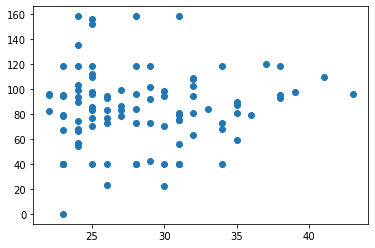

In [126]:
import pandas as pd
from matplotlib import pyplot as plt
plt.scatter(ages, ratings)
plt.show()

In [155]:
source2 = requests.get('https://www.pro-football-reference.com/years/2020/index.htm').text
soup2 = BeautifulSoup(source2, 'lxml')
#print(soup2.prettify())
body2 = soup2.find('tbody')
#print(body2.prettify())
teamname = body2.
print(teamname)
wins = body2.find("td", {"data-stat": "wins"}).text
#print(wins)


<tr class="thead onecell"><td class="right left" colspan="13" data-stat="onecell"> AFC East</td></tr>
